In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style

matplotlib.style.use('seaborn') 
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

<ipython-input-1-c7e7473e6cf8>:10: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]


In [2]:
def mult_cont_dofs( N, degree ):
    return (N+1)*( (2*degree-1)*N+1 )

def mult_desc_dofs( N, degree ):
    return (N+1)*2*(degree+1)*N

def local_dofs_RTL( N, degree ):    # RT x DGQLegendre
    # return N**2 * (16 + (11 + 3*degree)*(degree-1) )
    # return N**2 * (5 + 8*degree + 3*degree**2 ) 
    # return N**2 * (degree+1)*(3*degree+5)
    return N**2 * (3*(degree+1)**2 + 2*(degree+1) )

def local_dofs_LxL( N, degree ):    # DGQ²
    return N**2 * 3*(degree+1)**2

def dofsGalerkCont( N, degree ):    # DGQ²
    # return 3 * ( N*degree+1 + N*( degree + 1 + N*(  (degree+1)**2 - (degree+1)  ) - (N*degree+1) ))
    return 3 * (1 + N * ( N*(degree+1)**2 - 2*(N-1)*degree - N  ))

def plot_globalNlocal( local_dofs, global_dofs ):
    fig, ((ax1, ax2))  = plt.subplots(1, 2)
    ymax = max(local_dofs + global_dofs)
    plt.setp(((ax1, ax2)), ylim=(0,1.1*ymax))

    ax1.bar( N, local_dofs , color='indianred')
    ax1.set_title(" Espaços de Raviart-Thomas ")
    ax1.set_xlabel("Elementos")
    ax1.set_ylabel("Local DoFs")

    for index, value in enumerate(N):   
        ax1.text(value, local_dofs[index]+0.015*ymax, str(local_dofs[index]),ha='center',color='indianred')

    ax2.bar( N, global_dofs, color='darkslateblue' )
    ax2.set_title(" Multiplicador Contínuo ")
    ax2.set_xlabel("Elementos")
    ax2.set_ylabel("Global DoFs")

    for index, value in enumerate(N):   
        ax2.text(value, global_dofs[index]+0.015*ymax, str(global_dofs[index]),ha='center', color='darkslateblue')

    plt.tight_layout( )
    plt.suptitle(" Comparação de graus de liberdade ") # Centering title after the adjustment
    plt.tight_layout( ) # Adjusting after the title
    plt.show()

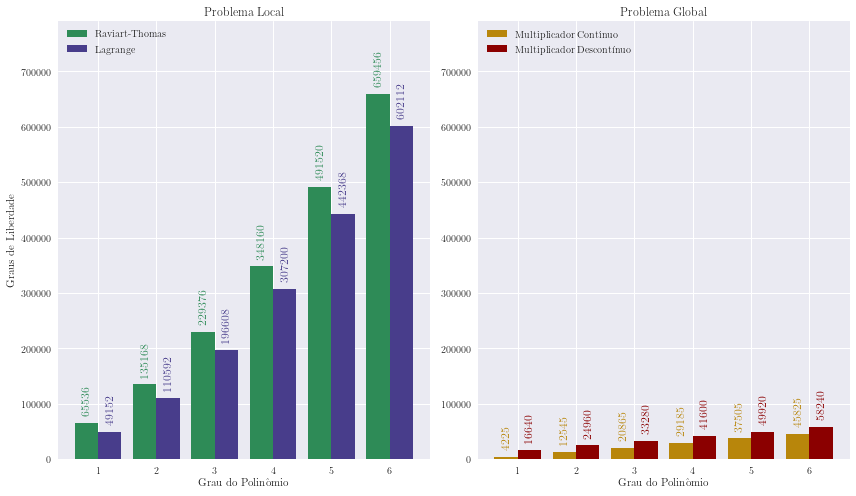

In [5]:
local_dofs_RT = []
local_dofs_DG = []
global_dofs_c = []
global_dofs_d = []
global_galerk = []

mesh_ref = 6
for degree in range(1,7):    
    local_dofs_RT.append( local_dofs_RTL(2**mesh_ref, degree) )
    local_dofs_DG.append( local_dofs_LxL(2**mesh_ref, degree) )
    global_dofs_c.append( mult_cont_dofs(2**mesh_ref, degree) )
    global_dofs_d.append( mult_desc_dofs(2**mesh_ref, degree) )
    global_galerk.append( dofsGalerkCont(2**mesh_ref, degree) )

df = pd.DataFrame( data = { 'RT': local_dofs_RT,     'DG': local_dofs_DG, 
                            'Cont': global_dofs_c,   'Desc': global_dofs_d, 'Galerk': global_galerk } )

fig, ((ax1, ax2))  = plt.subplots(1, 2, figsize=(12,7))
ymax = max( local_dofs_RT + local_dofs_DG ) 
plt.setp(((ax1, ax2)), ylim=(0,1.2*ymax))

xaxis = np.arange( 1, len(df)+1)

w1 = 0.4
ax1bar1 = [ i-0.5*w1 for i in xaxis ]
ax1bar2 = [ i+0.5*w1 for i in xaxis ]

w2 = 0.3
ax2bar1 = [ i-w2 for i in xaxis ]
ax2bar2 = [ i    for i in xaxis ]
ax2bar3 = [ i+w2 for i in xaxis ]

ax1.set_title(" Problema Local ")
ax1.set_xlabel("Grau do Polinômio")
ax1.set_ylabel("Graus de Liberdade")
ax2.set_title(" Problema Global ")
ax2.set_xlabel("Grau do Polinômio")

rt_color = 'seagreen'
dg_color = 'darkslateblue'
cont_color = 'darkgoldenrod' # 'firebrick'
desc_color = 'darkred' # 'navy'
galk_color = 'darkslategray'


ax1.bar( ax1bar1, df.RT,     w1, label='Raviart-Thomas',  color = rt_color )
for index, value in enumerate(ax1bar1):   
    ax1.text(value, df.RT[index]+0.018*ymax, str(df.RT[index]), ha='center', va='bottom', color=rt_color, rotation=90, fontsize=12)

ax1.bar( ax1bar2, df.DG,     w1, label='Lagrange',        color = dg_color )
for index, value in enumerate(ax1bar2):   
    ax1.text(value, df.DG[index]+0.018*ymax, str(df.DG[index]), ha='center', va='bottom', color=dg_color, rotation=90, fontsize=12)

ax2.bar( ax1bar1, df.Cont,   w1, label='Multiplicador Contínuo',    color = cont_color  )
for index, value in enumerate(ax1bar1):
    ax2.text(value, df.Cont[index]+0.018*ymax, str(df.Cont[index]), ha='center', va='bottom', color=cont_color, rotation=90, fontsize=12)

ax2.bar( ax1bar2, df.Desc,   w1, label='Multiplicador Descontínuo', color = desc_color  )
for index, value in enumerate(ax1bar2):   
    ax2.text(value, df.Desc[index]+0.018*ymax, str(df.Desc[index]), ha='center', va='bottom', color=desc_color, rotation=90, fontsize=12)

# ax2.bar( ax2bar3, df.Galerk, w2, label='Galerkin Contínuo',         color = galk_color  )
# for index, value in enumerate(ax2bar3):   
#     ax2.text(value, df.Galerk[index]+0.018*ymax, str(df.Galerk[index]), ha='center', va='bottom', color=galk_color, rotation=90, fontsize=12)

ax1.legend(loc='upper left')
ax2.legend(loc='upper left')
plt.tight_layout( )
# plt.suptitle(" Comparação de graus de liberdade para diferentes ordens polinomiais", fontsize=12, weight='bold') # Centering title after the adjustment
# plt.tight_layout( ) # Adjusting after the title
plt.savefig("dofs_compare.eps")
plt.show()
